# Fama-French 3-Factor Model(1992) Empirics

\begin{align*}
(r_i - r_f) = \alpha + \beta (r_M - r_f) + \theta_s SMB + \theta_v HML +\epsilon
\end{align*}

[FAMA-French Library](http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html)

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# factors(market, smb, hml)
factors = pd.read_csv('F-F_Research_Data_Factors.csv',index_col=0, header=3).dropna()
factors.columns = ['market', 'smb', 'hml', 'rf']
factors.head()

,market,smb,hml,rf
192607,2.96,-2.30,-2.87,0.22
192608,2.64,-1.40,4.19,0.25
192609,0.36,-1.32,0.01,0.23
192610,-3.24,0.04,0.51,0.32
192611,2.53,-0.20,-0.35,0.31


In [2]:
factors.index = factors.index.map(lambda x: datetime.strptime(str(x), "%Y%m"))
factors.head()

,market,smb,hml,rf
1926-07-01,2.96,-2.30,-2.87,0.22
1926-08-01,2.64,-1.40,4.19,0.25
1926-09-01,0.36,-1.32,0.01,0.23
1926-10-01,-3.24,0.04,0.51,0.32
1926-11-01,2.53,-0.20,-0.35,0.31


In [3]:
# 6 portfolios (ize: 2, value: 3)

ptf = pd.read_csv('6_Portfolios_2x3.csv',index_col=0, header=15).dropna()
ptf.index = ptf.index.map(lambda x: datetime.strptime(str(x), "%Y%m"))
ptf.columns = ['s_bm1','s_bm2','s_bm3','b_bm1','b_bm2','b_bm3']
ptf.head()

,s_bm1,s_bm2,s_bm3,b_bm1,b_bm2,b_bm3
1926-07-01,1.3724,0.9081,-0.0695,5.7168,1.9642,1.4222
1926-08-01,0.6095,1.5075,5.3842,2.7154,2.6838,6.3154
1926-09-01,-2.6779,-0.1359,-0.4374,1.4287,0.0709,-0.7967
1926-10-01,-3.5365,-4.3572,-2.0112,-3.5898,-2.3460,-4.0970
1926-11-01,3.1210,3.6608,2.0944,3.1292,2.8965,3.4614


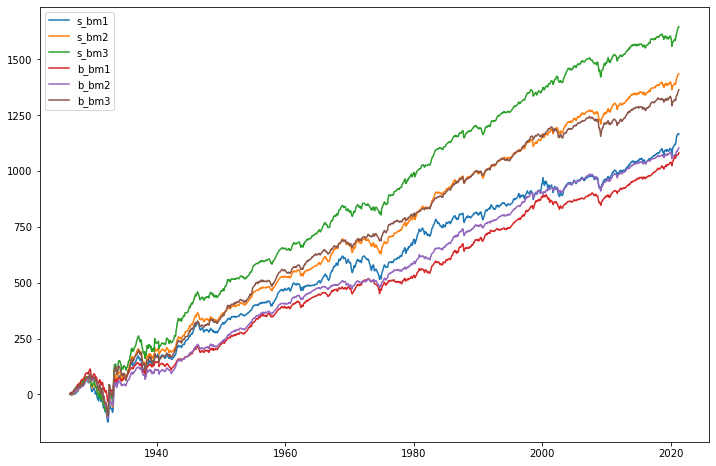

In [4]:
# performances of potfolios

plt.figure(figsize=(12,8))
for col in ptf.columns :
    plt.plot(ptf[col].cumsum(), label=col)
plt.legend()
plt.show()

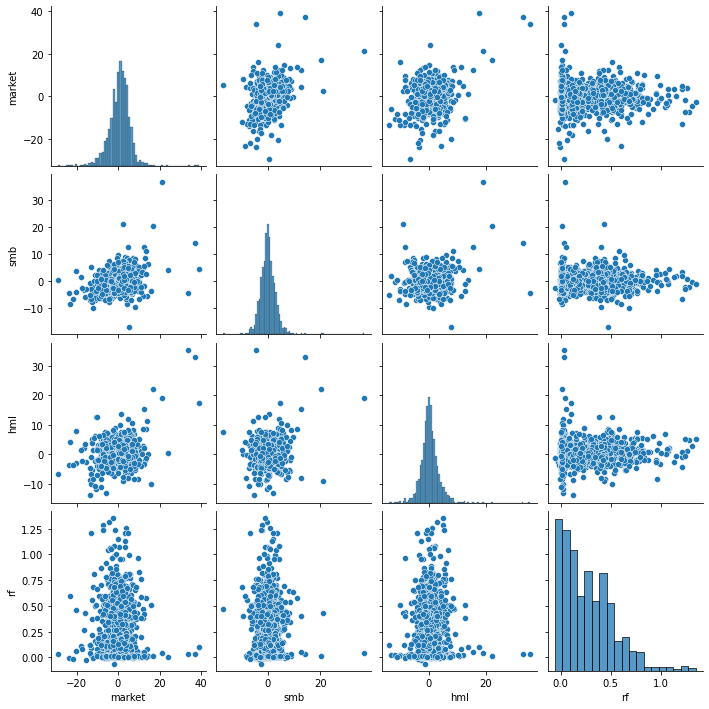

In [6]:
sns.pairplot(factors)

In [7]:
df = pd.concat([ptf, factors], axis=1)
df.head()

,s_bm1,s_bm2,s_bm3,b_bm1,b_bm2,b_bm3,market,smb,hml,rf
1926-07-01,1.3724,0.9081,-0.0695,5.7168,1.9642,1.4222,2.96,-2.30,-2.87,0.22
1926-08-01,0.6095,1.5075,5.3842,2.7154,2.6838,6.3154,2.64,-1.40,4.19,0.25
1926-09-01,-2.6779,-0.1359,-0.4374,1.4287,0.0709,-0.7967,0.36,-1.32,0.01,0.23
1926-10-01,-3.5365,-4.3572,-2.0112,-3.5898,-2.3460,-4.0970,-3.24,0.04,0.51,0.32
1926-11-01,3.1210,3.6608,2.0944,3.1292,2.8965,3.4614,2.53,-0.20,-0.35,0.31


In [8]:
import statsmodels.api as sm


y = df['s_bm1']
X = df[['market', 'smb', 'hml']]

ols = sm.OLS(y,sm.add_constant(X)).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  s_bm1   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 1.393e+04
Date:                Fri, 29 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:02:56   Log-Likelihood:                -1841.3
No. Observations:                1138   AIC:                             3691.
Df Residuals:                    1134   BIC:                             3711.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1279      0.037      3.491      0.000       0.056       0.200
market         1.0854      0.007    148.233      0.000       1.071       1.100
smb            1.0348      0.012     85.905      0.000       1.011       1.058
hml           -0.1851      0.011    -17.378      0.000      -0.206      -0.164
==============================================================================
Omnibus:                      152.188   Durbin-Watson:                   1.891
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1256.036
Skew:                           0.308   Prob(JB):                    1.80e-273
Kurtosis:                       8.110   Cond. No.                         5.71
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""